# **Predicting House Prices using Supervised Machine Learning with Scikit-Learn**

### About Dataset
There's a story behind every dataset and here's your opportunity to share yours.
Pakistan is the 5th most populous country and 33rd largest country. The real estate sector in Pakistan is one of the most expanding sector,, so it is of due importance to study the pricing of houses in different provinces, cities a and sectors of Pakistan to see what's the trend.

The data was created between May 15, 2020, 6:13 AM (UTC-07:00) to April 4, 2021, 12:41 PM (UTC-07:00).

Predictions can be achieved by different regression models!

### Acknowledgements
The data was web scraped by @huzzefakhan from Zameen.com using 'beautiful soup' python library. The dataset was originally uploaded on Open Data Pakistan (https://opendata.com.pk/dataset/property-data-for-pakistan). The author made a few changes (converting areas in marlas and kanals to cubic feet and dropping redundant columns) and reuploaded the dataset for easy usability.

# Importing Libraries

In [497]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

In [498]:
house_data = pd.read_csv('./dataset/real_estate_data.csv', index_col=0, parse_dates=['date_added'])

# Loading dataset and performing EDA, Preporcessing etc.

In [499]:
house_data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,NaN,NaN,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,NaN,NaN,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,NaN,NaN,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,NaN,NaN,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [500]:
house_data.shape

(168446, 17)

In [501]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   property_id    168446 non-null  int64         
 1   location_id    168446 non-null  int64         
 2   page_url       168446 non-null  object        
 3   property_type  168446 non-null  object        
 4   price          168446 non-null  int64         
 5   location       168446 non-null  object        
 6   city           168446 non-null  object        
 7   province_name  168446 non-null  object        
 8   latitude       168446 non-null  float64       
 9   longitude      168446 non-null  float64       
 10  baths          168446 non-null  int64         
 11  purpose        168446 non-null  object        
 12  bedrooms       168446 non-null  int64         
 13  date_added     168446 non-null  datetime64[ns]
 14  agency         124375 non-null  object        
 15  agent

## Checking for null values and duplicates.

In [502]:
house_data.isna().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [503]:
house_data.duplicated().sum()

np.int64(0)

## Dropping redundant columns and with high null values.

In [504]:
house_data.drop(columns=['agency', 'agent', 'property_id', 'location_id', 'page_url', 'latitude', 'longitude', 'date_added'], inplace=True)

# Summary stats for continous variables.

In [505]:
house_data.describe()

,price,baths,bedrooms,Total_Area
count,1.684460e+05,168446.000000,168446.000000,1.684460e+05
mean,1.776576e+07,2.874227,3.179422,1.394239e+04
std,3.531003e+07,2.463400,1.971401,8.623647e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.750000e+05,0.000000,2.000000,1.905757e+03
50%,8.500000e+06,3.000000,3.000000,4.356016e+03
75%,1.950000e+07,4.000000,4.000000,1.197904e+04
max,2.000000e+09,403.000000,68.000000,3.387988e+08


# Summary stats for categorical variables.

In [506]:
house_data.describe(include='object')

,property_type,location,city,province_name,purpose
count,168446,168446,168446,168446,168446
unique,7,1509,5,3,2
top,House,DHA Defence,Karachi,Punjab,For Sale
freq,105468,22046,60484,70536,120655


In [507]:
for col in house_data.describe(include='object').columns:
    print(house_data[col].unique())

['Flat' 'House' 'Penthouse' 'Farm House' 'Lower Portion' 'Upper Portion'
 'Room']
['G-10' 'E-11' 'G-15' ... 'Samanzar Colony' 'Shahra-e-Liaquat' 'Sundar']
['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']
['Islamabad Capital' 'Punjab' 'Sindh']
['For Sale' 'For Rent']


In [508]:
house_data[house_data['province_name'] == 'Punjab']

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
47,House,220000000,Model Town,Lahore,Punjab,0,For Sale,0,32670.000
48,House,40000000,Multan Road,Lahore,Punjab,5,For Sale,5,5445.000
49,House,9500000,Eden,Lahore,Punjab,0,For Sale,3,2450.259
50,House,125000000,Gulberg,Lahore,Punjab,7,For Sale,8,5445.000
51,House,21000000,Allama Iqbal Town,Lahore,Punjab,5,For Sale,6,2994.761
...,...,...,...,...,...,...,...,...,...
168426,House,44000000,DHA Defence,Lahore,Punjab,7,For Sale,6,5445.000
168427,House,55000000,DHA Defence,Lahore,Punjab,6,For Sale,5,5445.000
168428,House,20500000,DHA Defence,Lahore,Punjab,4,For Sale,3,2722.510
168429,House,170000000,DHA Defence,Lahore,Punjab,5,For Sale,5,10890.000


In [509]:
house_data[house_data['city'] == 'Karachi']

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
156,House,450000000,Cantt,Karachi,Sindh,7,For Sale,6,21780.000
157,House,35000000,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.016
158,Flat,21000000,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.339
159,House,6500000,Malir,Karachi,Sindh,1,For Sale,2,8712.032
160,House,13000000,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.096
...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096
168442,House,12500000,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.008
168443,House,27000000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096
168444,House,11000000,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.578


In [510]:
len(house_data.location.unique())

1509

## Subsetting the dataset for limiting to Karachi Only.

In [511]:
karachi_house_data = house_data[house_data['city'] == 'Karachi']

In [512]:
karachi_house_data.columns

Index(['property_type', 'price', 'location', 'city', 'province_name', 'baths',
       'purpose', 'bedrooms', 'Total_Area'],
      dtype='object')

In [513]:
print('Locations in Karachi: ', len(karachi_house_data.location.unique()))
karachi_house_data.location.unique()

Locations in Karachi:  203


array(['Cantt', 'Gulistan-e-Jauhar', 'DHA Defence', 'Malir', 'Gadap Town',
       'Gulshan-e-Iqbal Town', 'Scheme 33', 'Bath Island',
       'Abul Hassan Isphani Road', 'Nazimabad', 'Falcon Complex Faisal',
       'Shahra-e-Faisal', 'Gizri', 'Saddar Town', 'Federal B Area',
       'North Karachi', 'Navy Housing Scheme Karsaz', 'Jamshed Town',
       'Bahria Town Karachi', 'Jinnah Avenue', 'PAF Housing Scheme',
       'North Nazimabad', 'Clifton', 'Northern Bypass',
       'Fazaia Housing Scheme', 'New Karachi', 'Khalid Bin Walid Road',
       'Shaheed Millat Road', 'Anda Mor Road', 'Lyari Town',
       'Defence View Society', 'P & T Colony', 'Sea View Apartments',
       'Tariq Road', 'Baldia Town', 'Zamzama',
       'Gulshan-e-Usman Housing Society', 'Liaquatabad', 'Garden West',
       'Gulberg Town', 'Chapal Uptown', 'Baloch Colony', 'Manzoor Colony',
       'Aisha Manzil', 'Delhi Colony', 'Airport', 'Jamshed Road',
       'University Road', 'Shah Faisal Town', 'Civil Lines', 'Abid 

In [514]:
karachi_house_data

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
156,House,450000000,Cantt,Karachi,Sindh,7,For Sale,6,21780.000
157,House,35000000,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.016
158,Flat,21000000,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.339
159,House,6500000,Malir,Karachi,Sindh,1,For Sale,2,8712.032
160,House,13000000,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.096
...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096
168442,House,12500000,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.008
168443,House,27000000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096
168444,House,11000000,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.578


## Outlier Check and Feature Engineering

In [515]:
karachi_house_data.describe()

,price,baths,bedrooms,Total_Area
count,6.048400e+04,60484.000000,60484.000000,6.048400e+04
mean,1.983883e+07,2.632283,3.045103,1.358089e+04
std,3.830393e+07,1.931710,1.781785,2.328377e+04
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2.400000e+06,2.000000,2.000000,3.811514e+03
50%,8.500000e+06,3.000000,3.000000,1.143454e+04
75%,1.850000e+07,3.000000,4.000000,1.579056e+04
max,1.450000e+09,13.000000,68.000000,3.267000e+06


In [495]:
karachi_house

0.1111111111111111

### Converting total area which is in cubit feet to square feet, assuming average ceiling height for Karachi houses is 10ft

In [471]:
karachi_house_data

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area,sq_ft
156,House,450000000,Cantt,Karachi,Sindh,7,For Sale,6,21780.000,806.67
157,House,35000000,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.016,161.33
158,Flat,21000000,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.339,897.42
159,House,6500000,Malir,Karachi,Sindh,1,For Sale,2,8712.032,322.67
160,House,13000000,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.096,968.00
...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096,968.00
168442,House,12500000,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.008,80.67
168443,House,27000000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096,968.00
168444,House,11000000,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.578,786.50


<Axes: >

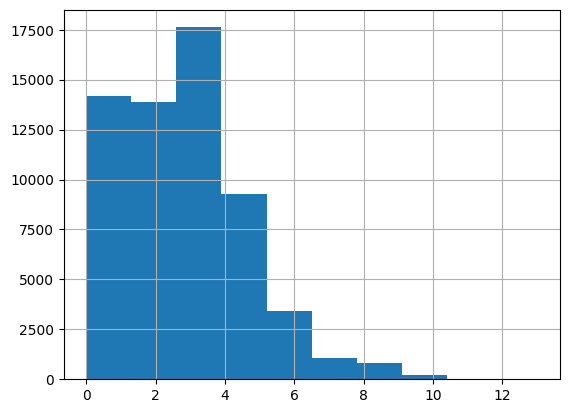

In [472]:
karachi_house_data['baths'].hist()

<Axes: >

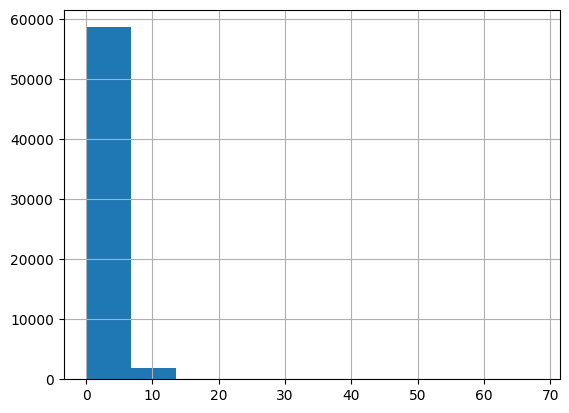

In [473]:
karachi_house_data['bedrooms'].hist()

<Axes: xlabel='bedrooms'>

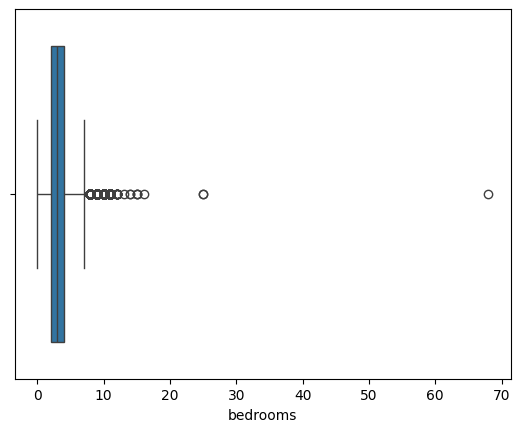

In [474]:
sns.boxplot(data=karachi_house_data, x='bedrooms')

In [475]:
karachi_house_data[karachi_house_data['baths'] == 0]

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area,sq_ft
168,Flat,29500000,Cantt,Karachi,Sindh,0,For Sale,3,31036.614,1149.50
169,Flat,30000000,Cantt,Karachi,Sindh,0,For Sale,3,31036.614,1149.50
170,Flat,37500000,Cantt,Karachi,Sindh,0,For Sale,4,35664.881,1320.92
171,Flat,45000000,Bath Island,Karachi,Sindh,0,For Sale,3,24230.339,897.42
174,Flat,5000000,Gulshan-e-Iqbal Town,Karachi,Sindh,0,For Sale,2,14701.554,544.50
...,...,...,...,...,...,...,...,...,...,...
168440,Flat,4800000,Gadap Town,Karachi,Sindh,0,For Sale,2,10345.538,383.17
168441,House,26500000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096,968.00
168442,House,12500000,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.008,80.67
168443,House,27000000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096,968.00


In [476]:
karachi_house_data['bedrooms'].value_counts()

bedrooms
3     21101
2     16064
4      7036
0      5633
6      4434
5      3461
1       842
7       744
8       562
9       232
10      183
11      172
12       10
15        3
14        2
25        2
13        1
16        1
68        1
Name: count, dtype: int64

### Checking houses with more than 16 bedrooms

In [443]:
karachi_house_data[karachi_house_data['bedrooms'] > 16]

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area,sq_ft


In [444]:
karachi_house_data = karachi_house_data[~(karachi_house_data['bedrooms'] > 16)]
karachi_house_data.shape

(55099, 10)

In [445]:
karachi_house_data[karachi_house_data['bedrooms'] > 16]

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area,sq_ft


In [446]:
karachi_house_data['bedrooms'].mean()

np.float64(3.34053249605256)

In [447]:
karachi_house_data['sq_ft'].min()

np.float64(10.08)

In [448]:
karachi_house_data[karachi_house_data['sq_ft'] == 0]

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area,sq_ft


In [449]:
karachi_house_data = karachi_house_data[~(karachi_house_data['sq_ft'] == 0)]

In [450]:
karachi_house_data[(karachi_house_data['baths'] == 0) & (karachi_house_data['bedrooms'] == 0)]

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area,sq_ft


In [416]:
karachi_house_data = karachi_house_data[~((karachi_house_data['baths'] == 0) & (karachi_house_data['bedrooms'] == 0))]
karachi_house_data.shape

(55099, 10)

In [425]:
karachi_house_data.reset_index(drop=True, inplace=True)

In [433]:
karachi_house_data

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area,sq_ft
0,House,450000000,Cantt,Karachi,Sindh,7,For Sale,6,21780.000,2178.00
1,House,35000000,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.016,435.60
2,Flat,21000000,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.339,2423.03
3,House,6500000,Malir,Karachi,Sindh,1,For Sale,2,8712.032,871.20
4,House,13000000,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.096,2613.61
...,...,...,...,...,...,...,...,...,...,...
55094,House,26500000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096,2613.61
55095,House,12500000,Gadap Town,Karachi,Sindh,0,For Sale,3,2178.008,217.80
55096,House,27000000,Gadap Town,Karachi,Sindh,0,For Sale,6,26136.096,2613.61
55097,House,11000000,Gadap Town,Karachi,Sindh,0,For Sale,3,21235.578,2123.56


In [426]:
karachi_house_data.describe()

,price,baths,bedrooms,Total_Area,sq_ft
count,5.509900e+04,55099.000000,55099.000000,55099.000000,55099.000000
mean,1.971702e+07,2.889508,3.340532,13319.100363,1331.909131
std,3.822349e+07,1.831109,1.548575,17475.379674,1747.538088
min,1.000000e+00,0.000000,0.000000,272.251000,27.230000
25%,2.200000e+06,2.000000,2.000000,3267.012000,326.700000
50%,8.500000e+06,3.000000,3.000000,11434.542000,1143.450000
75%,1.800000e+07,4.000000,4.000000,15790.558000,1579.060000
max,1.450000e+09,13.000000,16.000000,952875.000000,95287.500000


In [435]:
karachi_house_data[(karachi_house_data['sq_ft']/karachi_house_data['bedrooms'] < 100)]

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area,sq_ft
1,House,35000000,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.016,435.60
5,House,32000000,DHA Defence,Karachi,Sindh,4,For Sale,4,1089.004,108.90
8,House,110000000,DHA Defence,Karachi,Sindh,6,For Sale,6,5445.000,544.50
24,House,59500000,Malir,Karachi,Sindh,5,For Sale,5,3811.514,381.15
26,House,55000000,Malir,Karachi,Sindh,4,For Sale,4,3811.514,381.15
...,...,...,...,...,...,...,...,...,...,...
55089,House,8800000,Bahria Town Karachi,Karachi,Sindh,4,For Sale,3,2178.008,217.80
55090,House,5000000,Bahria Town Karachi,Karachi,Sindh,4,For Sale,3,1361.255,136.13
55091,House,14000000,Bahria Town Karachi,Karachi,Sindh,3,For Sale,3,2178.008,217.80
55092,House,14000000,Bahria Town Karachi,Karachi,Sindh,4,For Sale,4,3811.514,381.15


In [190]:
karachi_house_data_v6 = karachi_house_data_v5[(karachi_house_data_v5['sq_ft']/karachi_house_data_v5['bedrooms'] < 25)]

In [191]:
karachi_house_data_v7 = karachi_house_data_v6[~(karachi_house_data_v6['bedrooms'] == 0)]

In [192]:
karachi_house_data_v7[karachi_house_data_v7['baths'] == 0]

,property_type,price,location,baths,purpose,bedrooms,Total_Area,sq_ft
168,Flat,29500000,Cantt,0,For Sale,3,31036.614,987.604113
169,Flat,30000000,Cantt,0,For Sale,3,31036.614,987.604113
170,Flat,37500000,Cantt,0,For Sale,4,35664.881,1083.495685
171,Flat,45000000,Bath Island,0,For Sale,3,24230.339,837.348655
174,Flat,5000000,Gulshan-e-Iqbal Town,0,For Sale,2,14701.554,600.125613
...,...,...,...,...,...,...,...,...
168440,Flat,4800000,Gadap Town,0,For Sale,2,10345.538,474.790536
168441,House,26500000,Gadap Town,0,For Sale,6,26136.096,880.698272
168442,House,12500000,Gadap Town,0,For Sale,3,2178.008,168.024643
168443,House,27000000,Gadap Town,0,For Sale,6,26136.096,880.698272


In [193]:
karachi_house_data_v8 = karachi_house_data_v7.copy()
karachi_house_data_v8

,property_type,price,location,baths,purpose,bedrooms,Total_Area,sq_ft
156,House,450000000,Cantt,7,For Sale,6,21780.000,779.899395
157,House,35000000,Gulistan-e-Jauhar,8,For Sale,6,4356.016,266.722494
158,Flat,21000000,DHA Defence,3,For Sale,3,24230.339,837.348655
159,House,6500000,Malir,1,For Sale,2,8712.032,423.395568
160,House,13000000,Gadap Town,4,For Sale,4,26136.096,880.698272
...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,0,For Sale,6,26136.096,880.698272
168442,House,12500000,Gadap Town,0,For Sale,3,2178.008,168.024643
168443,House,27000000,Gadap Town,0,For Sale,6,26136.096,880.698272
168444,House,11000000,Gadap Town,0,For Sale,3,21235.578,766.848179


In [194]:
karachi_house_data_v8[karachi_house_data_v8['baths'] == 0]

,property_type,price,location,baths,purpose,bedrooms,Total_Area,sq_ft
168,Flat,29500000,Cantt,0,For Sale,3,31036.614,987.604113
169,Flat,30000000,Cantt,0,For Sale,3,31036.614,987.604113
170,Flat,37500000,Cantt,0,For Sale,4,35664.881,1083.495685
171,Flat,45000000,Bath Island,0,For Sale,3,24230.339,837.348655
174,Flat,5000000,Gulshan-e-Iqbal Town,0,For Sale,2,14701.554,600.125613
...,...,...,...,...,...,...,...,...
168440,Flat,4800000,Gadap Town,0,For Sale,2,10345.538,474.790536
168441,House,26500000,Gadap Town,0,For Sale,6,26136.096,880.698272
168442,House,12500000,Gadap Town,0,For Sale,3,2178.008,168.024643
168443,House,27000000,Gadap Town,0,For Sale,6,26136.096,880.698272


In [195]:
karachi_house_data_v8[karachi_house_data_v8['baths'] > karachi_house_data_v8['bedrooms']]

,property_type,price,location,baths,purpose,bedrooms,Total_Area,sq_ft
156,House,450000000,Cantt,7,For Sale,6,21780.000,779.899395
157,House,35000000,Gulistan-e-Jauhar,8,For Sale,6,4356.016,266.722494
165,House,12800000,Scheme 33,6,For Sale,5,26136.096,880.698272
167,Flat,34000000,Cantt,4,For Sale,3,31036.614,987.604113
172,House,17000000,Gulshan-e-Iqbal Town,5,For Sale,4,13068.048,554.805146
...,...,...,...,...,...,...,...,...
168431,House,14000000,Bahria Town Karachi,4,For Sale,3,1633.506,138.701287
168432,House,9500000,Bahria Town Karachi,4,For Sale,3,16607.311,650.927889
168433,House,14000000,Bahria Town Karachi,5,For Sale,4,3811.514,244.004787
168436,House,8800000,Bahria Town Karachi,4,For Sale,3,2178.008,168.024643


In [196]:
karachi_house_data_v9 = karachi_house_data_v8[~(karachi_house_data_v8['baths'] > karachi_house_data_v8['bedrooms']+2)]

In [197]:
karachi_house_data_v9[karachi_house_data_v9['baths'] > karachi_house_data_v9['bedrooms']]

,property_type,price,location,baths,purpose,bedrooms,Total_Area,sq_ft
156,House,450000000,Cantt,7,For Sale,6,21780.000,779.899395
157,House,35000000,Gulistan-e-Jauhar,8,For Sale,6,4356.016,266.722494
165,House,12800000,Scheme 33,6,For Sale,5,26136.096,880.698272
167,Flat,34000000,Cantt,4,For Sale,3,31036.614,987.604113
172,House,17000000,Gulshan-e-Iqbal Town,5,For Sale,4,13068.048,554.805146
...,...,...,...,...,...,...,...,...
168431,House,14000000,Bahria Town Karachi,4,For Sale,3,1633.506,138.701287
168432,House,9500000,Bahria Town Karachi,4,For Sale,3,16607.311,650.927889
168433,House,14000000,Bahria Town Karachi,5,For Sale,4,3811.514,244.004787
168436,House,8800000,Bahria Town Karachi,4,For Sale,3,2178.008,168.024643


In [198]:
karachi_house_data_v10 = karachi_house_data_v9.copy()

In [199]:
karachi_house_data_v10['baths'] = karachi_house_data_v10.apply(lambda x: karachi_house_data_v9[karachi_house_data_v9['bedrooms'] <= x['bedrooms']]['bedrooms'].median() if x['baths'] == 0 else x['baths'], axis=1)

In [200]:
karachi_house_data_v10

,property_type,price,location,baths,purpose,bedrooms,Total_Area,sq_ft
156,House,450000000,Cantt,7.0,For Sale,6,21780.000,779.899395
157,House,35000000,Gulistan-e-Jauhar,8.0,For Sale,6,4356.016,266.722494
158,Flat,21000000,DHA Defence,3.0,For Sale,3,24230.339,837.348655
159,House,6500000,Malir,1.0,For Sale,2,8712.032,423.395568
160,House,13000000,Gadap Town,4.0,For Sale,4,26136.096,880.698272
...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,3.0,For Sale,6,26136.096,880.698272
168442,House,12500000,Gadap Town,3.0,For Sale,3,2178.008,168.024643
168443,House,27000000,Gadap Town,3.0,For Sale,6,26136.096,880.698272
168444,House,11000000,Gadap Town,3.0,For Sale,3,21235.578,766.848179


In [201]:
karachi_house_data_v10[karachi_house_data_v10['baths'] == 0]

,property_type,price,location,baths,purpose,bedrooms,Total_Area,sq_ft


In [202]:
karachi_house_data_v11 = karachi_house_data_v10[~(karachi_house_data_v10['baths'] < karachi_house_data_v10['bedrooms']-5)]

In [203]:
karachi_house_data_v11

,property_type,price,location,baths,purpose,bedrooms,Total_Area,sq_ft
156,House,450000000,Cantt,7.0,For Sale,6,21780.000,779.899395
157,House,35000000,Gulistan-e-Jauhar,8.0,For Sale,6,4356.016,266.722494
158,Flat,21000000,DHA Defence,3.0,For Sale,3,24230.339,837.348655
159,House,6500000,Malir,1.0,For Sale,2,8712.032,423.395568
160,House,13000000,Gadap Town,4.0,For Sale,4,26136.096,880.698272
...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,3.0,For Sale,6,26136.096,880.698272
168442,House,12500000,Gadap Town,3.0,For Sale,3,2178.008,168.024643
168443,House,27000000,Gadap Town,3.0,For Sale,6,26136.096,880.698272
168444,House,11000000,Gadap Town,3.0,For Sale,3,21235.578,766.848179


In [204]:
karachi_house_data_v11['baths'] = karachi_house_data_v11['baths'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13040\2736455372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data_v11['baths'] = karachi_house_data_v11['baths'].astype(int)


In [205]:
karachi_house_data_v11

,property_type,price,location,baths,purpose,bedrooms,Total_Area,sq_ft
156,House,450000000,Cantt,7,For Sale,6,21780.000,779.899395
157,House,35000000,Gulistan-e-Jauhar,8,For Sale,6,4356.016,266.722494
158,Flat,21000000,DHA Defence,3,For Sale,3,24230.339,837.348655
159,House,6500000,Malir,1,For Sale,2,8712.032,423.395568
160,House,13000000,Gadap Town,4,For Sale,4,26136.096,880.698272
...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,3,For Sale,6,26136.096,880.698272
168442,House,12500000,Gadap Town,3,For Sale,3,2178.008,168.024643
168443,House,27000000,Gadap Town,3,For Sale,6,26136.096,880.698272
168444,House,11000000,Gadap Town,3,For Sale,3,21235.578,766.848179


In [206]:
karachi_house_data_v11.drop(columns=['Total_Area'], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13040\1726409703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data_v11.drop(columns=['Total_Area'], inplace=True)


In [207]:
karachi_house_data_v11['price'] = round(karachi_house_data_v11['price']/100000,2)
karachi_house_data_v11

C:\Users\DELL\AppData\Local\Temp\ipykernel_13040\2682882320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data_v11['price'] = round(karachi_house_data_v11['price']/100000,2)


,property_type,price,location,baths,purpose,bedrooms,sq_ft
156,House,4500.0,Cantt,7,For Sale,6,779.899395
157,House,350.0,Gulistan-e-Jauhar,8,For Sale,6,266.722494
158,Flat,210.0,DHA Defence,3,For Sale,3,837.348655
159,House,65.0,Malir,1,For Sale,2,423.395568
160,House,130.0,Gadap Town,4,For Sale,4,880.698272
...,...,...,...,...,...,...,...
168441,House,265.0,Gadap Town,3,For Sale,6,880.698272
168442,House,125.0,Gadap Town,3,For Sale,3,168.024643
168443,House,270.0,Gadap Town,3,For Sale,6,880.698272
168444,House,110.0,Gadap Town,3,For Sale,3,766.848179


In [208]:
karachi_house_data_v12 = karachi_house_data_v11[~(karachi_house_data_v11['sq_ft']/(karachi_house_data_v11['bedrooms'] + karachi_house_data_v11['baths']) > 300)]

In [209]:
karachi_house_data_v13 = karachi_house_data_v12[karachi_house_data_v12['property_type'] != 'Room']

In [210]:
karachi_house_data_v13[karachi_house_data_v13['sq_ft'] > 3000]

,property_type,price,location,baths,purpose,bedrooms,sq_ft
5442,House,800.0,Malir,10,For Sale,10,3248.263116
18823,House,15.0,Jamshed Town,10,For Rent,10,3374.428703
42008,House,1500.0,Jamshed Town,8,For Sale,8,3054.262678
58032,House,14500.0,KDA Scheme 1,8,For Sale,8,4796.065946
58748,House,5000.0,KDA Scheme 1,7,For Sale,7,3119.597581
62527,House,450.0,Scheme 33,10,For Sale,11,3798.780731
69862,House,2500.0,Kemari Town,7,For Sale,6,3248.263116
90015,House,5.0,Shahra-e-Faisal,6,For Rent,6,3119.597581
93101,House,160.0,Bahria Town Karachi,7,For Sale,5,3374.428703


In [211]:
karachi_house_data_v13.rename(columns={'price':'price_in_lakhs'}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13040\1205141608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  karachi_house_data_v13.rename(columns={'price':'price_in_lakhs'}, inplace=True)


In [212]:
karachi_house_data_v13 = karachi_house_data_v13[(karachi_house_data_v13['purpose'] == "For Sale") & (karachi_house_data_v13['property_type'] == "House")]

In [213]:
karachi_house_data_v13['sq_ft'] = round(karachi_house_data_v13['sq_ft'],2)

In [214]:
karachi_house_data_v13

,property_type,price_in_lakhs,location,baths,purpose,bedrooms,sq_ft
156,House,4500.0,Cantt,7,For Sale,6,779.90
157,House,350.0,Gulistan-e-Jauhar,8,For Sale,6,266.72
159,House,65.0,Malir,1,For Sale,2,423.40
160,House,130.0,Gadap Town,4,For Sale,4,880.70
161,House,320.0,DHA Defence,4,For Sale,4,105.85
...,...,...,...,...,...,...,...
168441,House,265.0,Gadap Town,3,For Sale,6,880.70
168442,House,125.0,Gadap Town,3,For Sale,3,168.02
168443,House,270.0,Gadap Town,3,For Sale,6,880.70
168444,House,110.0,Gadap Town,3,For Sale,3,766.85


In [215]:
karachi_house_data_v13.reset_index(drop=True, inplace=True)

In [216]:
karachi_house_data_v13.head()

,property_type,price_in_lakhs,location,baths,purpose,bedrooms,sq_ft
0,House,4500.0,Cantt,7,For Sale,6,779.90
1,House,350.0,Gulistan-e-Jauhar,8,For Sale,6,266.72
2,House,65.0,Malir,1,For Sale,2,423.40
3,House,130.0,Gadap Town,4,For Sale,4,880.70
4,House,320.0,DHA Defence,4,For Sale,4,105.85


In [217]:
location_dummy_df = pd.get_dummies(karachi_house_data_v13['location'], dtype='int')
location_dummy_df.head()

,APP Employees Co-operative Housing Society,ASF Housing Scheme,Abdullah Ahmed Road,Abdullah Haroon Road,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Al-Jadeed Residency,...,Stadium Road,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Teacher Society,Tipu Sultan Road,University Road,Zamzama,circular road
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
location_dummy_df.drop('Teacher Society', axis=1)

,APP Employees Co-operative Housing Society,ASF Housing Scheme,Abdullah Ahmed Road,Abdullah Haroon Road,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Al-Jadeed Residency,...,Siraj-ud-Daula Road,Stadium Road,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Tipu Sultan Road,University Road,Zamzama,circular road
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
property_dummy_df = pd.get_dummies(karachi_house_data_v13['property_type'], dtype='int')
property_dummy_df.head()

,House
0,1
1,1
2,1
3,1
4,1


In [220]:
purpose_dummy_df = pd.get_dummies(karachi_house_data_v13['purpose'], dtype='int')
purpose_dummy_df.head()

,For Sale
0,1
1,1
2,1
3,1
4,1


In [221]:
karachi_house_data_v14 = pd.concat([karachi_house_data_v13, location_dummy_df.drop(columns=['Teacher Society'])], axis=1)
karachi_house_data_v14.shape

(18516, 154)

In [222]:
karachi_house_data_v14.drop(columns=['location', 'purpose', 'property_type'], inplace=True)

In [223]:
karachi_house_data_v14.head()

,price_in_lakhs,baths,bedrooms,sq_ft,APP Employees Co-operative Housing Society,ASF Housing Scheme,Abdullah Ahmed Road,Abdullah Haroon Road,Abid Town,Abul Hassan Isphani Road,...,Siraj-ud-Daula Road,Stadium Road,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Tipu Sultan Road,University Road,Zamzama,circular road
0,4500.0,7,6,779.90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,350.0,8,6,266.72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,1,2,423.40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,130.0,4,4,880.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,320.0,4,4,105.85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
karachi_house_data_v14.shape

(18516, 151)

In [225]:
karachi_house_data_v14['sq_ft'] = round(karachi_house_data_v14['sq_ft'],2)

In [226]:
karachi_house_data_v14

,price_in_lakhs,baths,bedrooms,sq_ft,APP Employees Co-operative Housing Society,ASF Housing Scheme,Abdullah Ahmed Road,Abdullah Haroon Road,Abid Town,Abul Hassan Isphani Road,...,Siraj-ud-Daula Road,Stadium Road,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Tipu Sultan Road,University Road,Zamzama,circular road
0,4500.0,7,6,779.90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,350.0,8,6,266.72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,1,2,423.40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,130.0,4,4,880.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,320.0,4,4,105.85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18511,265.0,3,6,880.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18512,125.0,3,3,168.02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18513,270.0,3,6,880.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18514,110.0,3,3,766.85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
karachi_house_data_v14[['sq_ft', 'price_in_lakhs']].corr()

,sq_ft,price_in_lakhs
sq_ft,1.000000,0.277121
price_in_lakhs,0.277121,1.000000


In [228]:
X = karachi_house_data_v14.drop(columns=['price_in_lakhs'])
y = karachi_house_data_v14['price_in_lakhs']

In [229]:
X.head()

,baths,bedrooms,sq_ft,APP Employees Co-operative Housing Society,ASF Housing Scheme,Abdullah Ahmed Road,Abdullah Haroon Road,Abid Town,Abul Hassan Isphani Road,Airport,...,Siraj-ud-Daula Road,Stadium Road,Suparco Road,Super Highway,Surti Muslim Co-Operative Housing Society,Tariq Road,Tipu Sultan Road,University Road,Zamzama,circular road
0,7,6,779.90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,6,266.72,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,423.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,880.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,105.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
y.head()

0    4500.0
1     350.0
2      65.0
3     130.0
4     320.0
Name: price_in_lakhs, dtype: float64

In [231]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [232]:
X_test.shape

(3704, 150)

In [233]:
y_train

6131     365.0
14518    510.0
7791     170.0
12300    170.0
16029    525.0
         ...  
9372     150.0
7291      25.0
17728    200.0
7293      85.0
17673    125.0
Name: price_in_lakhs, Length: 14812, dtype: float64

In [234]:
from sklearn.linear_model import Lasso, Ridge

mdl = Ridge(alpha=1.0)

mdl.fit(X_train, y_train)

mdl.score(X_test, y_test)


0.5821312120164079

In [235]:
from sklearn.tree import DecisionTreeRegressor

mdl = DecisionTreeRegressor()

mdl.fit(X_train, y_train)

mdl.score(X_test, y_test)

0.7599069060315136

In [248]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(max_depth=5)

r_mdl = RandomForestRegressor(max_depth=20)

r_mdl.fit(X_train, y_train)

r_mdl.score(X_test, y_test)


0.791912308122501

In [238]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_absolute_error(y_test, r_mdl.predict(X_test))

np.float64(88.46632613187921)

In [239]:
mean_squared_error(y_test, r_mdl.predict(X_test), squared=False)

d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(247.72662156413762)

In [245]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(X_train, y_train)

xgb_model.score(X_test, y_test)

0.8062720671615783

In [252]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_score(r_mdl, X, y, cv=kfold)

array([0.75086301, 0.84787767, 0.79420132, 0.86982445, 0.85547884])

In [256]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth  
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=r_mdl, param_distributions=param_grid,
                                   n_iter=100, cv=kfold, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(max_depth=20), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [260]:
best_model = random_search.best_estimator_

mean_absolute_error(y_test, best_model.predict(X_test))

np.float64(88.68906023023754)

In [262]:
random_search.best_score_

np.float64(0.803650371576936)

In [263]:
X.columns

Index(['baths', 'bedrooms', 'sq_ft',
       'APP Employees Co-operative Housing Society', 'ASF Housing Scheme',
       'Abdullah Ahmed Road', 'Abdullah Haroon Road', 'Abid Town',
       'Abul Hassan Isphani Road', 'Airport',
       ...
       'Siraj-ud-Daula Road', 'Stadium Road', 'Suparco Road', 'Super Highway',
       'Surti Muslim Co-Operative Housing Society', 'Tariq Road',
       'Tipu Sultan Road', 'University Road', 'Zamzama', 'circular road'],
      dtype='object', length=150)

In [283]:
import numpy as np
loc_index = np.where(X.columns == "Nazimabad")[0][0]

x = np.zeros(len(X.columns))
x[0] = 2
x[1] = 2
x[2] = 40

if loc_index >= 0:
    x[loc_index] = 1

print(x)

[ 2.  2. 40.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


In [284]:
best_model.predict([x])[0]

d:\Ali Work\Data Science Work\machine-learning-house-price-predcition\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(35.00917063466663)

In [280]:
karachi_house_data_v13[(karachi_house_data_v13["location"] == "Nazimabad") & (karachi_house_data_v13["sq_ft"] >= 240.0) & (karachi_house_data_v13['baths'] >= 7) ]

,property_type,price_in_lakhs,location,baths,purpose,bedrooms,sq_ft
9,House,400.0,Nazimabad,8,For Sale,11,1099.98
2256,House,500.0,Nazimabad,7,For Sale,7,1284.02
2991,House,255.0,Nazimabad,8,For Sale,11,614.85
4868,House,1000.0,Nazimabad,7,For Sale,6,1965.22
5190,House,800.0,Nazimabad,8,For Sale,8,1294.13
7010,House,580.0,Nazimabad,8,For Sale,10,288.51
7066,House,300.0,Nazimabad,9,For Sale,8,592.69
8136,House,650.0,Nazimabad,10,For Sale,11,288.51
8606,House,325.0,Nazimabad,7,For Sale,11,818.42
8726,House,600.0,Nazimabad,10,For Sale,11,1299.17
